<a href="https://colab.research.google.com/github/ZEBAAFROZ/LIME/blob/main/LIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
pip install lime

In [21]:
import tensorflow.keras as keras
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import requests
from skimage.segmentation import slic
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import lime
import warnings
# load model data
r = requests.get('https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json')
feature_names = r.json()
model = VGG16()


In [23]:
import skimage.io
import skimage.transform

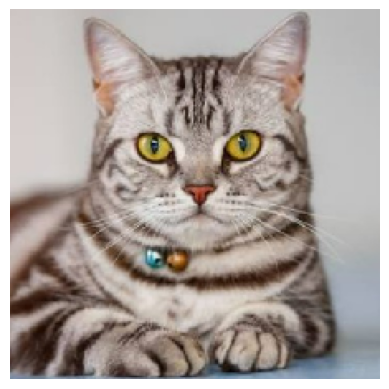

In [25]:
# load an image
file = "/content/cat.jpg"
img = image.load_img(file, target_size=(224, 224))
img_orig = image.img_to_array(img)
plt.imshow(img);
plt.axis('off');

In [26]:
def predict_fn(images):
    # Return the model's predicted probabilities for the input images
    predictions = model.predict(images)
    return predictions


In [27]:
from lime import lime_image

In [28]:
# Initialize the LimeImageExplainer and explain the prediction
explainer = lime_image.LimeImageExplainer()

# Choose the number of samples for the explanation
num_samples = 1000



In [29]:

segmentation_fn = lambda img: slic(img, n_segments=100, compactness=1, sigma=1)



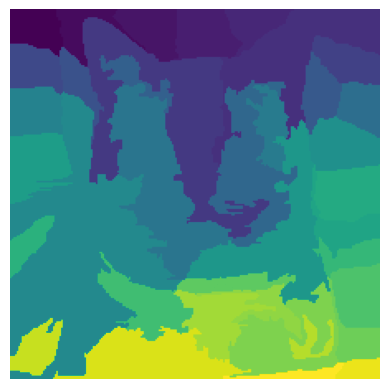

In [30]:
segments_slic = slic(img, n_segments=100, compactness=2, sigma=1)
plt.imshow(segments_slic);
plt.axis('off');

#segmentation_fn = segments_slic(img)

In [31]:
explanation = explainer.explain_instance(img_orig, predict_fn, top_labels=1, num_samples=num_samples, num_features=5, segmentation_fn=segmentation_fn)

# Get the explanation for the top class
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 29ms/step


In [32]:
from skimage.segmentation import slic, mark_boundaries

In [33]:
superimposed_image = mark_boundaries(img_orig, mask)

# Convert the superimposed image to a numpy array
superimposed_image_np = np.array(superimposed_image)

# Create a black mask for non-explanation regions
black_mask = np.where(mask == 0)

# Black out non-explanation regions in the superimposed image
superimposed_image_np[black_mask] = 0

1/1 [==============================] - 0s 53ms/step


<Axes: title={'center': 'Top 10 Predictions'}>

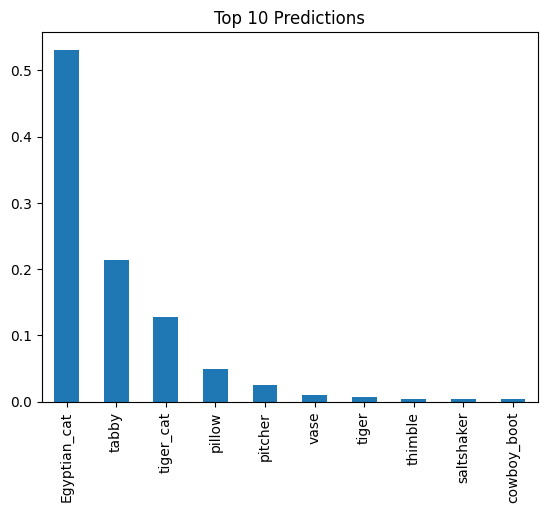

In [34]:
preds = model.predict(img_orig.reshape(1, 224, 224, 3))
top_preds = np.argsort(-preds)
inds = top_preds[0]
top_10_pred=pd.Series(data={feature_names[str(inds[i])][1]:preds[0, inds[i]] for i in range(10)})
top_10_pred.plot(kind='bar', title='Top 10 Predictions')

In [35]:
predictions = model.predict(img_orig.reshape(1, 224, 224, 3))
predicted_class_index = np.argmax(predictions)
predicted_class_label = decode_predictions(predictions, top=1)[0][0][1]
predicted_probability = np.max(predictions)

1/1 [==============================] - 0s 61ms/step


In [36]:
predictions = model.predict(img_orig.reshape(1, 224, 224, 3))
predicted_class_index = np.argsort(predictions)
predicted_class_label = decode_predictions(predictions, top=1)[0][0][1]
predicted_probability = np.max(predictions)

1/1 [==============================] - 0s 36ms/step


In [37]:
predicted_class_label

'Egyptian_cat'

In [38]:
print("Predicted Class Label: ", predicted_class_label)
print("Prediction Probability: {:.2f}".format(predicted_probability))

Predicted Class Label:  Egyptian_cat
Prediction Probability: 0.53


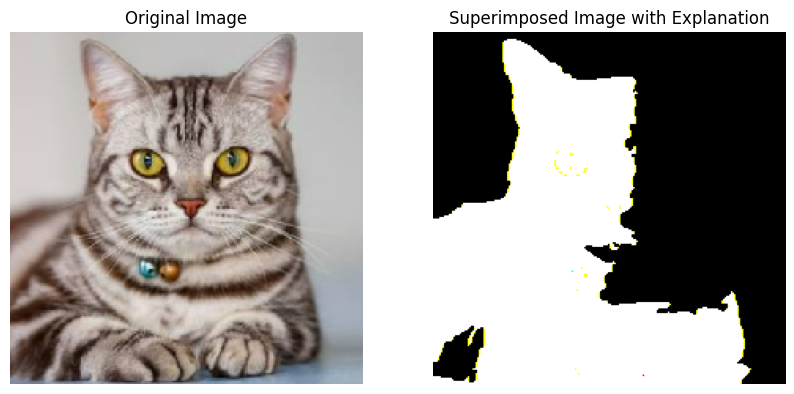

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img)
axs[0].axis('off')
axs[0].set_title('Original Image')

axs[1].imshow(superimposed_image_np)
axs[1].axis('off')
axs[1].set_title('Superimposed Image with Explanation')

plt.show()

In [40]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

Exp_img = array_to_img(superimposed_image_np)

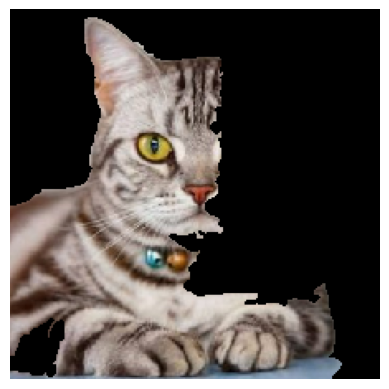

In [41]:
plt.imshow(Exp_img);
plt.axis('off');

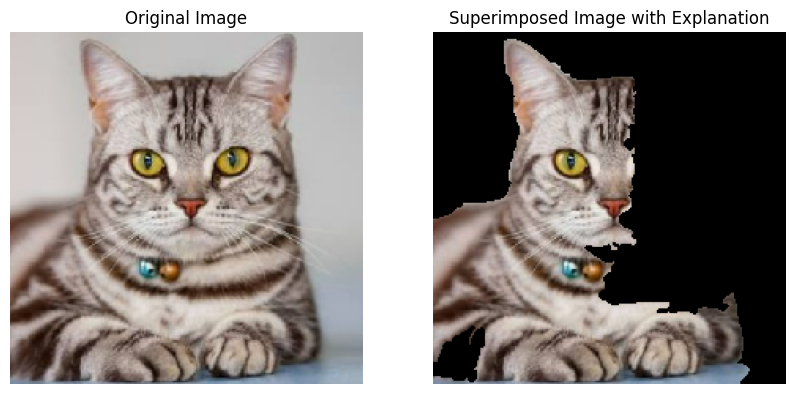

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img)
axs[0].axis('off')
axs[0].set_title('Original Image')

axs[1].imshow(Exp_img)
axs[1].axis('off')
axs[1].set_title('Superimposed Image with Explanation')

plt.show()